In [1]:
import pickle
import numpy as np
import random
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, GRU, Embedding, Input, BatchNormalization,InputLayer
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from gensim.models import Word2Vec
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from numpy import array
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

/Users/nishu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def readFromFile(aFile):
    with open(aFile, 'rb') as f:
        loaded_obj = pickle.load(f, encoding='latin1')
    return loaded_obj

In [3]:
def writeToFile(aData, aFile):
    with open(aFile, 'wb') as f:
        pickle.dump(aData, f, protocol=2)

In [4]:
tr_list= readFromFile('processed_data/GE11_tr.pickle')
len(tr_list)

8666

In [5]:
dev_list= readFromFile('processed_data/GE11_dev.pickle')
len(dev_list)

2886

In [6]:
test_list= readFromFile('processed_data/GE11_test.pickle')
len(test_list)

3360

In [7]:
sentence = '';
for elem in tr_list[0]:
    sentence = sentence + " " +elem['token']
print(sentence)
for elem in tr_list[0]:
    display(elem)

 Down-regulation of interferon regulatory factor 4 gene expression in leukemic cells due to hypermethylation of CpG motifs in the promoter region


{'event': 'Negative_regulation',
 'id': 'bt_0',
 'lcpos': 'None',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'None',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'None',
 'pos': 'NN',
 'rcpos': 'IN',
 'rdep': 'prep_due_to',
 'rdpos': 'NN',
 'rdtoken': 'hypermethylation',
 'rrcpos': 'NN',
 'rrdep': 'prep_in',
 'rrdpos': 'NN',
 'rtoken': 'of',
 'sentLoc': 0.0,
 'sentLocldep': -0.1,
 'sentLocrdep': 0.6190476190476191,
 'token': 'Down-regulation'}

{'event': 'None',
 'id': 'bt_1',
 'lcpos': 'NN',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'None',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'Down-regulation',
 'pos': 'IN',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'JJ',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'interferon',
 'sentLoc': 0.047619047619047616,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'of'}

{'event': 'None',
 'id': 'bt_2',
 'lcpos': 'IN',
 'ldep': 'nn',
 'ldpos': 'NN',
 'ldtoken': 'factor',
 'llcpos': 'NN',
 'lldep': 'nn',
 'lldpos': 'NN',
 'ltoken': 'of',
 'pos': 'NN',
 'rcpos': 'JJ',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'regulatory',
 'sentLoc': 0.09523809523809523,
 'sentLocldep': 0.19047619047619047,
 'sentLocrdep': -0.1,
 'token': 'interferon'}

{'event': 'None',
 'id': 'bt_3',
 'lcpos': 'NN',
 'ldep': 'amod',
 'ldpos': 'NN',
 'ldtoken': 'factor',
 'llcpos': 'IN',
 'lldep': 'nn',
 'lldpos': 'NN',
 'ltoken': 'interferon',
 'pos': 'JJ',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'CD',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'factor',
 'sentLoc': 0.14285714285714285,
 'sentLocldep': 0.19047619047619047,
 'sentLocrdep': -0.1,
 'token': 'regulatory'}

{'event': 'None',
 'id': 'bt_4',
 'lcpos': 'JJ',
 'ldep': 'nn',
 'ldpos': 'NN',
 'ldtoken': 'expression',
 'llcpos': 'NN',
 'lldep': 'prep_of',
 'lldpos': 'NN',
 'ltoken': 'regulatory',
 'pos': 'NN',
 'rcpos': 'CD',
 'rdep': 'num',
 'rdpos': 'CD',
 'rdtoken': '4',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': '4',
 'sentLoc': 0.19047619047619047,
 'sentLocldep': 0.3333333333333333,
 'sentLocrdep': 0.23809523809523808,
 'token': 'factor'}

{'event': 'None',
 'id': 'bt_5',
 'lcpos': 'NN',
 'ldep': 'num',
 'ldpos': 'NN',
 'ldtoken': 'factor',
 'llcpos': 'JJ',
 'lldep': 'nn',
 'lldpos': 'NN',
 'ltoken': 'factor',
 'pos': 'CD',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'gene',
 'sentLoc': 0.23809523809523808,
 'sentLocldep': 0.19047619047619047,
 'sentLocrdep': -0.1,
 'token': '4'}

{'event': 'None',
 'id': 'bt_6',
 'lcpos': 'CD',
 'ldep': 'nn',
 'ldpos': 'NN',
 'ldtoken': 'expression',
 'llcpos': 'NN',
 'lldep': 'prep_of',
 'lldpos': 'NN',
 'ltoken': '4',
 'pos': 'NN',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'IN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'expression',
 'sentLoc': 0.2857142857142857,
 'sentLocldep': 0.3333333333333333,
 'sentLocrdep': -0.1,
 'token': 'gene'}

{'event': 'Gene_expression',
 'id': 'bt_7',
 'lcpos': 'NN',
 'ldep': 'prep_of',
 'ldpos': 'NN',
 'ldtoken': 'Down-regulation',
 'llcpos': 'CD',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'gene',
 'pos': 'NN',
 'rcpos': 'IN',
 'rdep': 'nn',
 'rdpos': 'NN',
 'rdtoken': 'gene',
 'rrcpos': 'JJ',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'in',
 'sentLoc': 0.3333333333333333,
 'sentLocldep': 0.0,
 'sentLocrdep': 0.2857142857142857,
 'token': 'expression'}

{'event': 'None',
 'id': 'bt_8',
 'lcpos': 'NN',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'NN',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'expression',
 'pos': 'IN',
 'rcpos': 'JJ',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NNS',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'leukemic',
 'sentLoc': 0.38095238095238093,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'in'}

{'event': 'None',
 'id': 'bt_9',
 'lcpos': 'IN',
 'ldep': 'amod',
 'ldpos': 'NNS',
 'ldtoken': 'cells',
 'llcpos': 'NN',
 'lldep': 'prep_in',
 'lldpos': 'NN',
 'ltoken': 'in',
 'pos': 'JJ',
 'rcpos': 'NNS',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'IN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'cells',
 'sentLoc': 0.42857142857142855,
 'sentLocldep': 0.47619047619047616,
 'sentLocrdep': -0.1,
 'token': 'leukemic'}

{'event': 'None',
 'id': 'bt_10',
 'lcpos': 'JJ',
 'ldep': 'prep_in',
 'ldpos': 'NN',
 'ldtoken': 'Down-regulation',
 'llcpos': 'IN',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'leukemic',
 'pos': 'NNS',
 'rcpos': 'IN',
 'rdep': 'amod',
 'rdpos': 'JJ',
 'rdtoken': 'leukemic',
 'rrcpos': 'TO',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'due',
 'sentLoc': 0.47619047619047616,
 'sentLocldep': 0.0,
 'sentLocrdep': 0.42857142857142855,
 'token': 'cells'}

{'event': 'None',
 'id': 'bt_11',
 'lcpos': 'NNS',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'JJ',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'cells',
 'pos': 'IN',
 'rcpos': 'TO',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'to',
 'sentLoc': 0.5238095238095238,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'due'}

{'event': 'None',
 'id': 'bt_12',
 'lcpos': 'IN',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'NNS',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'due',
 'pos': 'TO',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'IN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'hypermethylation',
 'sentLoc': 0.5714285714285714,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'to'}

{'event': 'None',
 'id': 'bt_13',
 'lcpos': 'TO',
 'ldep': 'prep_due_to',
 'ldpos': 'NN',
 'ldtoken': 'Down-regulation',
 'llcpos': 'IN',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'to',
 'pos': 'NN',
 'rcpos': 'IN',
 'rdep': 'prep_in',
 'rdpos': 'NN',
 'rdtoken': 'region',
 'rrcpos': 'NN',
 'rrdep': 'nn',
 'rrdpos': 'NN',
 'rtoken': 'of',
 'sentLoc': 0.6190476190476191,
 'sentLocldep': 0.0,
 'sentLocrdep': 0.9523809523809523,
 'token': 'hypermethylation'}

{'event': 'None',
 'id': 'bt_14',
 'lcpos': 'NN',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'TO',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'hypermethylation',
 'pos': 'IN',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NNS',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'CpG',
 'sentLoc': 0.6666666666666666,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'of'}

{'event': 'None',
 'id': 'bt_15',
 'lcpos': 'IN',
 'ldep': 'nn',
 'ldpos': 'NNS',
 'ldtoken': 'motifs',
 'llcpos': 'NN',
 'lldep': 'prep_of',
 'lldpos': 'NN',
 'ltoken': 'of',
 'pos': 'NN',
 'rcpos': 'NNS',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'IN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'motifs',
 'sentLoc': 0.7142857142857143,
 'sentLocldep': 0.7619047619047619,
 'sentLocrdep': -0.1,
 'token': 'CpG'}

{'event': 'None',
 'id': 'bt_16',
 'lcpos': 'NN',
 'ldep': 'prep_of',
 'ldpos': 'NN',
 'ldtoken': 'hypermethylation',
 'llcpos': 'IN',
 'lldep': 'prep_due_to',
 'lldpos': 'NN',
 'ltoken': 'CpG',
 'pos': 'NNS',
 'rcpos': 'IN',
 'rdep': 'nn',
 'rdpos': 'NN',
 'rdtoken': 'CpG',
 'rrcpos': 'DT',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'in',
 'sentLoc': 0.7619047619047619,
 'sentLocldep': 0.6190476190476191,
 'sentLocrdep': 0.7142857142857143,
 'token': 'motifs'}

{'event': 'None',
 'id': 'bt_17',
 'lcpos': 'NNS',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'NN',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'motifs',
 'pos': 'IN',
 'rcpos': 'DT',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'the',
 'sentLoc': 0.8095238095238095,
 'sentLocldep': -0.1,
 'sentLocrdep': -0.1,
 'token': 'in'}

{'event': 'None',
 'id': 'bt_18',
 'lcpos': 'IN',
 'ldep': 'det',
 'ldpos': 'NN',
 'ldtoken': 'region',
 'llcpos': 'NNS',
 'lldep': 'prep_in',
 'lldpos': 'NN',
 'ltoken': 'in',
 'pos': 'DT',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'NN',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'promoter',
 'sentLoc': 0.8571428571428571,
 'sentLocldep': 0.9523809523809523,
 'sentLocrdep': -0.1,
 'token': 'the'}

{'event': 'None',
 'id': 'bt_19',
 'lcpos': 'DT',
 'ldep': 'nn',
 'ldpos': 'NN',
 'ldtoken': 'region',
 'llcpos': 'IN',
 'lldep': 'prep_in',
 'lldpos': 'NN',
 'ltoken': 'the',
 'pos': 'NN',
 'rcpos': 'NN',
 'rdep': 'None',
 'rdpos': 'None',
 'rdtoken': 'None',
 'rrcpos': 'None',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'region',
 'sentLoc': 0.9047619047619048,
 'sentLocldep': 0.9523809523809523,
 'sentLocrdep': -0.1,
 'token': 'promoter'}

{'event': 'None',
 'id': 'bt_20',
 'lcpos': 'NN',
 'ldep': 'prep_in',
 'ldpos': 'NN',
 'ldtoken': 'hypermethylation',
 'llcpos': 'DT',
 'lldep': 'prep_due_to',
 'lldpos': 'NN',
 'ltoken': 'promoter',
 'pos': 'NN',
 'rcpos': 'None',
 'rdep': 'nn',
 'rdpos': 'NN',
 'rdtoken': 'promoter',
 'rrcpos': 'None',
 'rrdep': 'None',
 'rrdpos': 'None',
 'rtoken': 'None',
 'sentLoc': 0.9523809523809523,
 'sentLocldep': 0.6190476190476191,
 'sentLocrdep': 0.9047619047619048,
 'token': 'region'}

In [8]:
tr_list[0][0]

{'event': 'Negative_regulation',
 'id': 'bt_0',
 'lcpos': 'None',
 'ldep': 'None',
 'ldpos': 'None',
 'ldtoken': 'None',
 'llcpos': 'None',
 'lldep': 'None',
 'lldpos': 'None',
 'ltoken': 'None',
 'pos': 'NN',
 'rcpos': 'IN',
 'rdep': 'prep_due_to',
 'rdpos': 'NN',
 'rdtoken': 'hypermethylation',
 'rrcpos': 'NN',
 'rrdep': 'prep_in',
 'rrdpos': 'NN',
 'rtoken': 'of',
 'sentLoc': 0.0,
 'sentLocldep': -0.1,
 'sentLocrdep': 0.6190476190476191,
 'token': 'Down-regulation'}

In [9]:
def getWordEmb(aSentList):
    sentences_corpus = list();
    for sent_elem in aSentList:
        sentence = list();
        for word in sent_elem:
            #print(word['token'])
            sentence.append(word['token']);
        sentences_corpus.append(sentence);
    wemb = Word2Vec(sentences_corpus, min_count=1)
    return wemb;

In [10]:
all_sent_list = tr_list + dev_list
#all_sent_list.extend(dev_list)
#all_sent_list.append(dev_list)
print(len(all_sent_list))
print(len(tr_list))
print(len(dev_list))
emb_model = getWordEmb(all_sent_list);

print(emb_model['gene'][0])

11552
8666
2886
0.767306


/Users/nishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [11]:
pos_superset_all= {};
dep_tag_superset_all={};
event_type_superset_all={};

pos_superset_tr= {};
dep_tag_superset_tr={};
event_type_superset_tr={};

pos_superset_dev= {};
dep_tag_superset_dev={};
event_type_superset_dev={};


def addToMetaDataMetrics(aSent, pos_superset, dep_tag_superset, event_type_superset):
    for word in sent:
        if word['pos'] in pos_superset:
            pos_superset[word['pos']] = pos_superset[word['pos']] + 1;
        else:
            pos_superset[word['pos']] = 1;
        if word['ldep']:
            if word['ldep'] in dep_tag_superset:
                dep_tag_superset[word['ldep']] = dep_tag_superset[word['ldep']] + 1;
            else:
                dep_tag_superset[word['ldep']]=1;
        if word['rdep']:
            if word['rdep'] in dep_tag_superset:
                dep_tag_superset[word['rdep']] = dep_tag_superset[word['rdep']] + 1;
            else:
                dep_tag_superset[word['rdep']] = 1;
        if word['event']:
            if word['event'] in event_type_superset:
                event_type_superset[word['event']] = event_type_superset[word['event']] + 1;
            else:
                event_type_superset[word['event']] = 1;

for sent in tr_list:
    addToMetaDataMetrics(sent, pos_superset_tr, dep_tag_superset_tr, event_type_superset_tr);
for sent in dev_list:
    addToMetaDataMetrics(sent, pos_superset_dev, dep_tag_superset_dev, event_type_superset_dev);

pos_superset_all.update(pos_superset_tr);
pos_superset_all.update(pos_superset_dev);
dep_tag_superset_all.update(dep_tag_superset_tr);
dep_tag_superset_all.update(dep_tag_superset_dev);
event_type_superset_all.update(event_type_superset_tr);
event_type_superset_all.update(event_type_superset_dev);
#for sent in test_list:
#    addToMetaDataMetrics(sent);

pos_keys = list(pos_superset_all.keys())
pos_keys.append('None');
dep_keys = list(dep_tag_superset_all.keys())
event_keys = list(event_type_superset_all.keys())

In [12]:
print('POS Categories', len(pos_keys))
print('Dependency tag Categories', len(dep_keys))

POS Categories 40
Dependency tag Categories 210


In [13]:
num_out_class = len(event_keys);
num_pos = len(pos_keys);
num_dep = len(dep_keys);
batch_size = 128;
epoch_size = 100;
markov_two= False;
markov_one_enc=False;
dep_enabled = True;
word_enc_enabled = True;
basic = True;
meta_info = True;


In [14]:
event_keys

['Negative_regulation',
 'None',
 'Gene_expression',
 'Regulation',
 'Transcription',
 'Positive_regulation',
 'Binding',
 'Localization',
 'Phosphorylation',
 'Protein_catabolism']

In [15]:
event_type_superset_all

{'Binding': 255,
 'Gene_expression': 555,
 'Localization': 43,
 'Negative_regulation': 325,
 'None': 73094,
 'Phosphorylation': 73,
 'Positive_regulation': 682,
 'Protein_catabolism': 18,
 'Regulation': 194,
 'Transcription': 115}

In [16]:
import seaborn as sns
import pandas as pd
import copy
import matplotlib.pyplot as plt

def plotEventDistribution(aData, title_part):
    plt.figure(figsize=(15,5))
    data = {'Event': list(aData.keys()), 'Event_Freq': list(aData.values())}
    df = pd.DataFrame.from_dict(data)
    df = df.sort_values(['Event']).reset_index(drop=True)
    sns.set(style="whitegrid")
    
    chart = sns.barplot(x="Event", y="Event_Freq", data=df);
    chart.set_title('Event class distribution '+title_part, fontsize='large', fontweight='bold');
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize='large');
    plt.show()
    
event_type_data = copy.deepcopy(event_type_superset_tr);
del(event_type_data['None'])
plotEventDistribution(event_type_data, '(training dataset)')

event_type_data = copy.deepcopy(event_type_superset_dev);
del(event_type_data['None'])
plotEventDistribution(event_type_data, '(devel dataset)')



226687


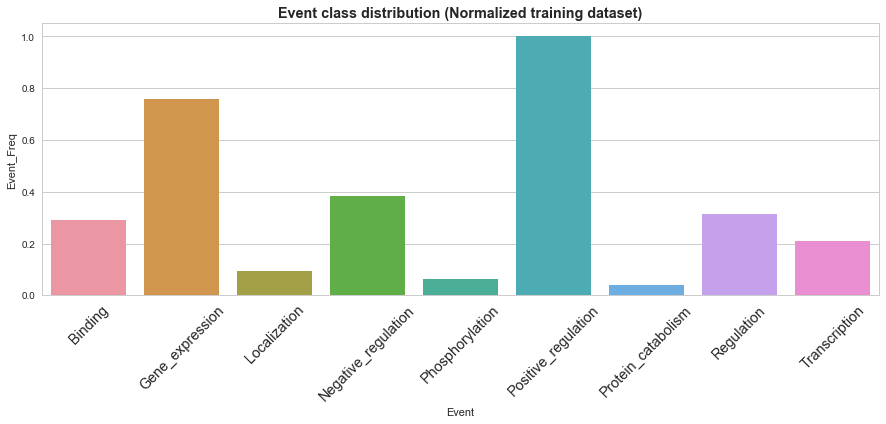

In [17]:
event_type_data = copy.deepcopy(event_type_superset_tr);
print(event_type_data['None'])
del(event_type_data['None'])
factor=1.0/max(event_type_data.values())
norm_event_type_data = {k: v*factor for k, v in event_type_data.items() }
plotEventDistribution(norm_event_type_data, '(Normalized training dataset)')



In [18]:
def getMetaData(aDataSet):
    trig_pos_dict ={}
    lneigh_pos_dict ={}
    rneigh_pos_dict ={}
    trig_ldept_dict ={}
    trig_rdept_dict ={}
    
    for sent_obj in aDataSet:
        for elem in sent_obj:
            if elem['event'] != 'None':
                elem_val = elem['pos'];
                dict_obj = trig_pos_dict;
                if elem_val in dict_obj:
                    dict_obj[elem_val] = dict_obj[elem_val] +1;
                else:
                    dict_obj[elem_val] = 1;
                elem_val = elem['lcpos'];
                dict_obj = lneigh_pos_dict;
                if elem_val in dict_obj:
                    dict_obj[elem_val] = dict_obj[elem_val] +1;
                else:
                    dict_obj[elem_val] = 1;
                elem_val = elem['rcpos'];
                dict_obj = rneigh_pos_dict;
                if elem_val in dict_obj:
                    dict_obj[elem_val] = dict_obj[elem_val] +1;
                else:
                    dict_obj[elem_val] = 1;
                elem_val = elem['ldep'];
                dict_obj = trig_ldept_dict;
                if elem_val in dict_obj:
                    dict_obj[elem_val] = dict_obj[elem_val] +1;
                else:
                    dict_obj[elem_val] = 1;
                elem_val = elem['rdep'];
                dict_obj = trig_rdept_dict;
                if elem_val in dict_obj:
                    dict_obj[elem_val] = dict_obj[elem_val] +1;
                else:
                    dict_obj[elem_val] = 1;
    del(lneigh_pos_dict['None']);
    del(rneigh_pos_dict['None']);
    del(trig_ldept_dict['None']);
    del(trig_rdept_dict['None']);
    return(trig_pos_dict, lneigh_pos_dict, rneigh_pos_dict, trig_ldept_dict, trig_rdept_dict);

In [19]:
def pruneDictBasedOnFreq(aDict, aLowLimit, aHigherLimit):
    dict_copy = dict(aDict);
    max_val = max(aDict.values())
    min_val = min(aDict.values())
    min_thr = min_val + (max_val - min_val)*aLowLimit;
    max_thr = max_val + (max_val - min_val)*aHigherLimit;
    for (key, val) in aDict.items():
        if val < min_thr or val > max_thr:
            del dict_copy[key]
    return dict_copy;

In [20]:
trig_pos_dict, lneigh_pos_dict, rneigh_pos_dict, trig_ldept_dict, trig_rdept_dict = getMetaData(tr_list)

In [21]:
def plotMetaData(aData, xaxisKey, yaxisKey, titleVal):
    plt.figure(figsize=(15,5))
    data = {xaxisKey: list(aData.keys()), yaxisKey: list(aData.values())}
    df = pd.DataFrame.from_dict(data)
    df = df.sort_values([xaxisKey]).reset_index(drop=True)
    sns.set(style="whitegrid")
    
    chart = sns.barplot(x=xaxisKey, y=yaxisKey, data=df);
    chart.set_title(titleVal, fontsize='large', fontweight='bold');
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45,fontsize='large');
    plt.show()

Total POS:  16


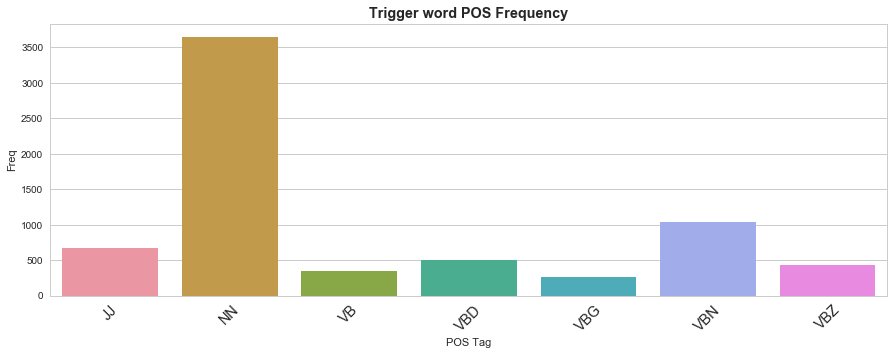

In [22]:
print('Total POS: ', len(trig_pos_dict.keys()))
pruned = pruneDictBasedOnFreq(trig_pos_dict, 0.055, 1)
plotMetaData(pruned, 'POS Tag', 'Freq', 'Trigger word POS Frequency')

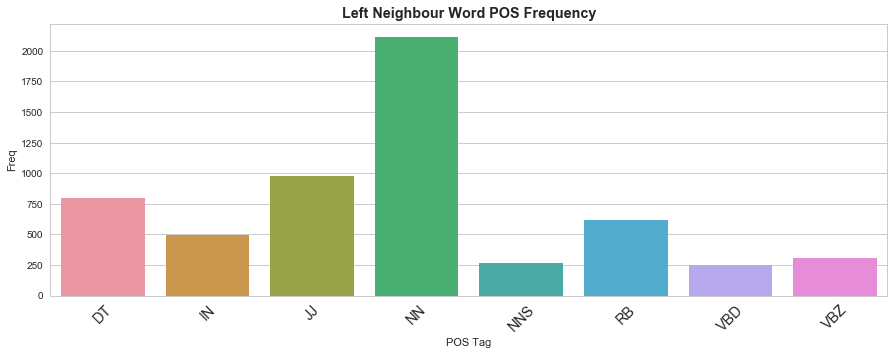

In [23]:
pruned = pruneDictBasedOnFreq(lneigh_pos_dict, 0.11, 1)
plotMetaData(pruned, 'POS Tag', 'Freq', 'Left Neighbour Word POS Frequency')

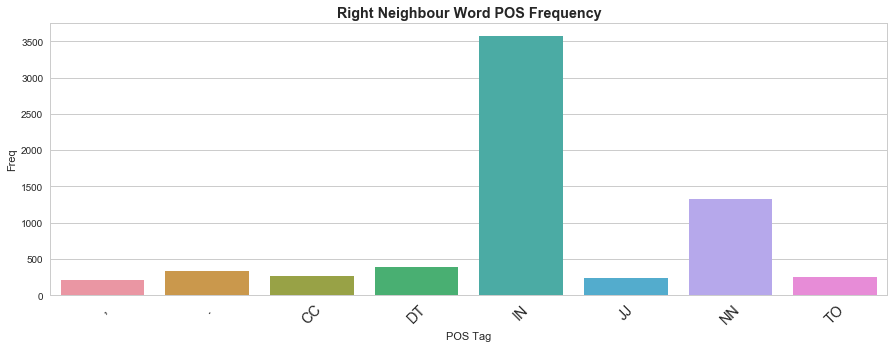

In [24]:
pruned = pruneDictBasedOnFreq(rneigh_pos_dict, 0.05, 1)
plotMetaData(pruned, 'POS Tag', 'Freq', 'Right Neighbour Word POS Frequency')

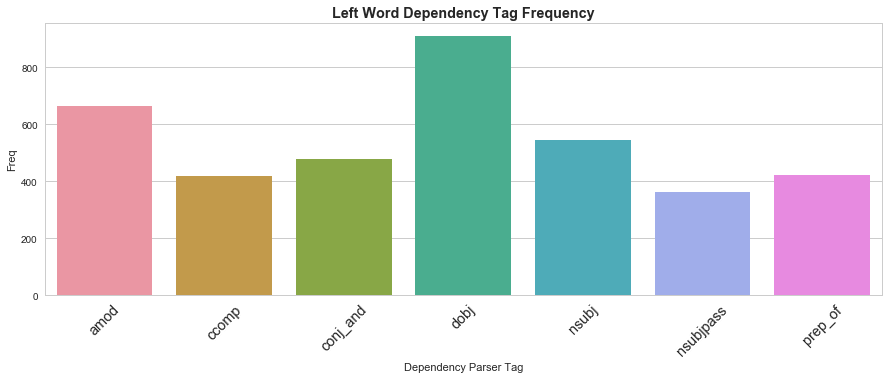

In [25]:
pruned = pruneDictBasedOnFreq(trig_ldept_dict, 0.3, 1)
plotMetaData(pruned, 'Dependency Parser Tag', 'Freq', 'Left Word Dependency Tag Frequency')

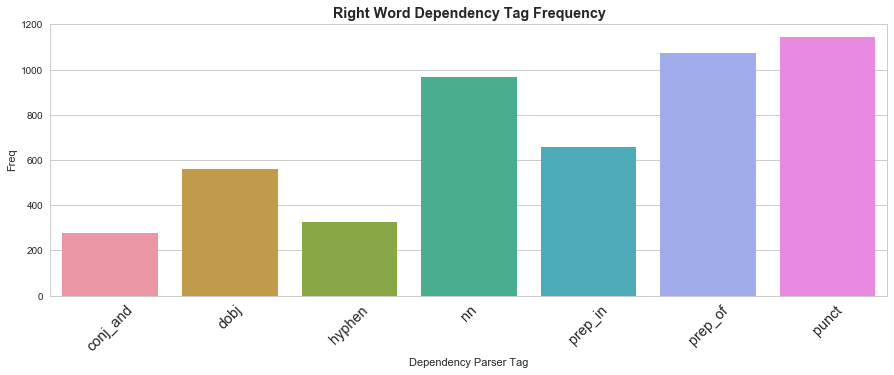

In [26]:
pruned = pruneDictBasedOnFreq(trig_rdept_dict, 0.18, 1)
plotMetaData(pruned, 'Dependency Parser Tag', 'Freq', 'Right Word Dependency Tag Frequency')

In [27]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

event_keys_array = np.array(event_keys)
pos_keys_array = np.array(pos_keys)
dep_keys_array = np.array(dep_keys)

event_encoder = LabelEncoder();
event_encoder = event_encoder.fit(event_keys_array)
pos_encoder = LabelEncoder();
pos_encoder = pos_encoder.fit(pos_keys_array)
dep_encoder = LabelEncoder();
dep_encoder = dep_encoder.fit(dep_keys_array)

from keras.utils import to_categorical;
def getPosIp(aPos):
    return to_categorical(pos_encoder.transform(aPos), num_classes=num_pos)
def getDepIp(aDep):
    return to_categorical(dep_encoder.transform(aDep), num_classes=num_dep)
def getEvent(aEvent):
    return to_categorical(event_encoder.transform(aEvent)[0], num_out_class);
def getWordLen(aWord):
    return np.array([len(aWord)]);
def getWordLoc(aWordLoc):
    return np.array([aWordLoc]);

In [28]:
sample_pos_ip = getPosIp([pos_keys[0]]);
sample_dep_ip = getDepIp([dep_keys[0]]);
sample_word_enc_ip = emb_model['gene'];
sample_wl = getWordLen('negative');
sample_wloc = getWordLoc(4);
mk_pos = 0;
mk_dep = 0;
dep_fields=0;
dep_pos_fields=0;
mk_one_enc=0;
wrd_enc_fields = 0;
basic_pos=0;
meta_wl=0;
meta_wloc=0;
if meta_info:
    meta_wl = 5;
    meta_wloc = 3;

if basic:
    basic_pos=3
if markov_two:
    mk_pos=4;
    mk_dep=2;
if markov_one_enc:
    mk_one_enc=4;
if word_enc_enabled:
    wrd_enc_fields = 1;
if dep_enabled:
    dep_fields=2;
    dep_pos_fields = 2;
    
ip_dim = len(sample_pos_ip[0])*(basic_pos+dep_pos_fields+mk_pos) + len(sample_dep_ip[0])*(dep_fields+mk_dep) + len(sample_word_enc_ip)*(wrd_enc_fields+mk_one_enc) + len(sample_wloc)*meta_wloc + len(sample_wl)*meta_wl;
print("Ip Dimension: ", ip_dim)

Ip Dimension:  728


/Users/nishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
wrdcnt = 0;
for sent in tr_list:
    wrdcnt = wrdcnt + len(sent)
wrdcnt

234075

In [43]:
import random
random.uniform(0, 1)
def getNNData(aSentList, aCountAllNone=False):
    x=[];
    y=[];
    for sent in aSentList:
        for word in sent:
            if word['event'] == 'None':
                if not aCountAllNone:
                    if random.uniform(0,1) > 0.0002:
                        continue;
            #if word['event'] not in ['None']:
                #print(word['token'], word['event'])
            wp = getPosIp([word['pos']])[0]; 
            wlcp = getPosIp([word['lcpos']])[0];
            wrcp = getPosIp([word['rcpos']])[0];
            wldp = getPosIp([word['ldpos']])[0];
            wrdp = getPosIp([word['rdpos']])[0];
            wld = getDepIp([word['ldep']])[0];
            wrd = getDepIp([word['rdep']])[0];
            partial_elem = np.ndarray((0,));
            if markov_two:
                wllcp = getPosIp([word['llcpos']])[0];
                wrrcp = getPosIp([word['rrcpos']])[0];
                wlldp = getPosIp([word['lldpos']])[0];
                wrrdp = getPosIp([word['rrdpos']])[0];
                wlld = getDepIp([word['lldep']])[0];
                wrrd = getDepIp([word['rrdep']])[0];
                partial_elem = np.concatenate((partial_elem, wllcp, wrrcp, wlldp, wrrdp, wlld, wrrd));
            if markov_one_enc:
                wle = emb_model[word['ltoken']];
                wre = emb_model[word['rtoken']];
                wlde = emb_model[word['ldtoken']];
                wrde = emb_model[word['rdtoken']];
                partial_elem = np.concatenate((partial_elem, wle, wre, wlde, wrde));
            if dep_enabled:
                partial_elem = np.concatenate((partial_elem, wldp, wrdp, wld, wrd));
            if word_enc_enabled:
                we = emb_model[word['token']];
                partial_elem = np.concatenate((partial_elem, we));
            if basic:
                partial_elem = np.concatenate((partial_elem, wp, wlcp, wrcp))
            if meta_info:
                wlen = getWordLen(word['token']);
                wllen= getWordLen(word['ltoken']);
                wrlen= getWordLen(word['rtoken']);
                wldlen= getWordLen(word['ldtoken']);
                wrdlen= getWordLen(word['rdtoken']);
                wloc = getWordLoc(word['sentLoc']);
                wldeploc = getWordLoc(word['sentLocldep'])
                wrdeploc = getWordLoc(word['sentLocrdep'])
                partial_elem = np.concatenate((partial_elem, wlen, wllen, wrlen, wldlen, wrdlen, wloc, wldeploc, wrdeploc));
            x_elem = partial_elem
            x.append(x_elem);
            y.append(getEvent([word['event']]));
    x=np.array(x);
    y=np.array(y);
    return(x,y)

In [44]:
(x_tr, y_tr) = getNNData(tr_list);
print(np.shape(x_tr), np.shape(y_tr), type(x_tr), type(y_tr))

/Users/nishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(7425, 728) (7425, 10) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [45]:
(x_test, y_test) = getNNData(dev_list);
print(np.shape(x_test), np.shape(y_test), type(x_test), type(y_test))

/Users/nishu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


(2270, 728) (2270, 10) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [46]:
#(x_utst, y_utst) = getNNData(test_list, True);
#print(np.shape(x_utst), np.shape(y_utst), type(x_utst), type(y_utst))

In [48]:
x_val, x_tst, y_val, y_tst = train_test_split(x_test, y_test, test_size=0.5, stratify=y_test)

In [49]:
print(np.shape(x_val), np.shape(y_tst), type(x_val), type(y_tst))

(1135, 728) (1135, 10) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [50]:
# model
model = Sequential()

model.add(InputLayer(input_shape=(ip_dim,), name='.'))
model.add(BatchNormalization(name='stage-1'))
model.add(Dense(512, activation='relu', name='st1_activation_relu')) # fully connected
model.add(Dropout(0.7, name='hyperparameter_0.7'))


model.add(BatchNormalization(name='stage-2'))
model.add(Dense(256, activation='relu', name='st2_activation_relu')) # fully connected
model.add(Dropout(0.6, name='hyperparameter_0.6'))


model.add(BatchNormalization(name='stage-3'))
model.add(Dense(32, activation='relu',name='st3_activation_relu')) # fully connected
model.add(BatchNormalization(name='stage-4'))
model.add(Dense(16, activation='relu',name='st4_activation_relu')) # fully connected

model.add(BatchNormalization(name='stage-5'))
# softmax layer
model.add(Dense(num_out_class, activation='softmax',name='activation_softmax'))

# model summary
model.summary(line_length=100)

____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
. (InputLayer)                               (None, 728)                             0              
____________________________________________________________________________________________________
stage-1 (BatchNormalization)                 (None, 728)                             2912           
____________________________________________________________________________________________________
st1_activation_relu (Dense)                  (None, 512)                             373248         
____________________________________________________________________________________________________
hyperparameter_0.7 (Dropout)                 (None, 512)                             0              
___________________________________________________________________________________________

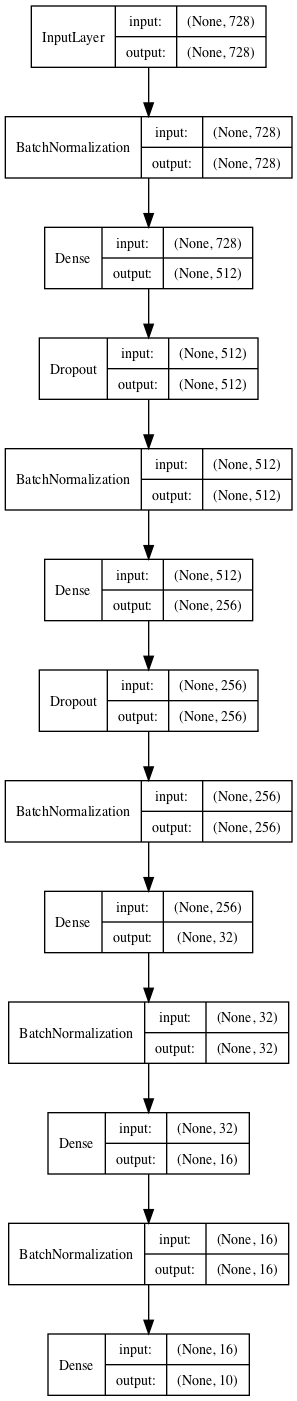

In [51]:
import pydot
from keras.utils import plot_model
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=False)

from PIL import Image
im = Image.open("model_structure.png")
display(im)

In [52]:
def compileModel():
    model.compile(loss=keras.losses.categorical_crossentropy,
                  #optimizer=keras.optimizers.Adadelta(),
                  optimizer='adam',
                  metrics=['accuracy'])
    return model;

In [53]:
compileModel()

In [54]:
from sklearn.utils import class_weight
y_tr_decoded = np.argmax(y_tr, axis=1)
print(np.bincount(y_tr_decoded))
cw = class_weight.compute_class_weight('balanced',np.unique(y_tr_decoded), y_tr_decoded)
cw

[ 681 1773  223  901   37  148 2340   93  738  491]


array([ 1.09030837,  0.41878173,  3.32959641,  0.82408435, 20.06756757,
        5.01689189,  0.31730769,  7.98387097,  1.00609756,  1.51221996])

In [55]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
x_tr_sm, y_tr_sm = smt.fit_resample(x_tr, y_tr)
print(np.shape(x_tr), np.shape(y_tr), type(x_tr), type(y_tr))
print(np.shape(x_tr_sm), np.shape(y_tr_sm), type(x_tr_sm), type(y_tr_sm))

(7425, 728) (7425, 10) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(23400, 728) (23400, 10) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [56]:
from sklearn.utils import class_weight
y_tr_decoded = np.argmax(y_tr_sm, axis=1)
print(np.bincount(y_tr_decoded))
cw = class_weight.compute_class_weight('balanced',np.unique(y_tr_decoded), y_tr_decoded)
cw

[2340 2340 2340 2340 2340 2340 2340 2340 2340 2340]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [57]:
model.fit(x_tr_sm, y_tr_sm,
          batch_size=batch_size,
          epochs=100,
          verbose=1,
          class_weight=cw,
          shuffle=True,
          validation_data=(x_val, y_val))

Train on 23400 samples, validate on 1135 samples
Epoch 1/100
23400/23400 [==============================] - 8s 330us/step - loss: 1.6640 - acc: 0.4391 - val_loss: 1.4132 - val_acc: 0.4855
Epoch 2/100
23400/23400 [==============================] - 5s 228us/step - loss: 1.0114 - acc: 0.6758 - val_loss: 1.1380 - val_acc: 0.6018
Epoch 3/100
23400/23400 [==============================] - 6s 237us/step - loss: 0.7830 - acc: 0.7459 - val_loss: 1.0650 - val_acc: 0.6317
Epoch 4/100
23400/23400 [==============================] - 5s 231us/step - loss: 0.6862 - acc: 0.7737 - val_loss: 1.0119 - val_acc: 0.6529
Epoch 5/100
23400/23400 [==============================] - 5s 229us/step - loss: 0.6306 - acc: 0.7910 - val_loss: 0.9950 - val_acc: 0.6687
Epoch 6/100
23400/23400 [==============================] - 5s 229us/step - loss: 0.5828 - acc: 0.8059 - val_loss: 1.0078 - val_acc: 0.6731
Epoch 7/100
23400/23400 [==============================] - 5s 231us/step - loss: 0.5562 - acc: 0.8124 - val_loss: 0.9

23400/23400 [==============================] - 6s 260us/step - loss: 0.2589 - acc: 0.9053 - val_loss: 0.9063 - val_acc: 0.7330
Epoch 60/100
23400/23400 [==============================] - 6s 267us/step - loss: 0.2567 - acc: 0.9079 - val_loss: 0.8928 - val_acc: 0.7313
Epoch 61/100
23400/23400 [==============================] - 5s 232us/step - loss: 0.2512 - acc: 0.9104 - val_loss: 0.8916 - val_acc: 0.7383
Epoch 62/100
23400/23400 [==============================] - 5s 226us/step - loss: 0.2565 - acc: 0.9088 - val_loss: 0.9048 - val_acc: 0.7330
Epoch 63/100
23400/23400 [==============================] - 5s 230us/step - loss: 0.2524 - acc: 0.9100 - val_loss: 0.9054 - val_acc: 0.7286
Epoch 64/100
23400/23400 [==============================] - 5s 230us/step - loss: 0.2570 - acc: 0.9080 - val_loss: 0.9312 - val_acc: 0.7181
Epoch 65/100
23400/23400 [==============================] - 5s 229us/step - loss: 0.2504 - acc: 0.9124 - val_loss: 0.9023 - val_acc: 0.7348
Epoch 66/100
23400/23400 [=======

In [58]:
def calcMetrics(aX, aY):
    from sklearn.metrics import classification_report
    y_pred = model.predict(aX, batch_size=batch_size, verbose=1)
    y_pred_bool = np.argmax(y_pred, axis=1)
    y_tst_bool = np.argmax(aY , axis=1)
    y_pred_label = event_encoder.inverse_transform(y_pred_bool)
    y_tst_label = event_encoder.inverse_transform(y_tst_bool)
    print(classification_report(y_tst_label, y_pred_label))


In [59]:
#Performance metrics on training data
print('\nPerformance metrics on training data:\n')
calcMetrics(x_tr, y_tr)


Performance metrics on training data:

7425/7425 [==============================] - 1s 183us/step
                     precision    recall  f1-score   support

            Binding       0.98      0.98      0.98       681
    Gene_expression       0.94      0.92      0.93      1773
       Localization       0.91      0.96      0.94       223
Negative_regulation       0.90      0.91      0.91       901
               None       0.86      1.00      0.92        37
    Phosphorylation       0.97      0.99      0.98       148
Positive_regulation       0.95      0.91      0.93      2340
 Protein_catabolism       0.96      1.00      0.98        93
         Regulation       0.82      0.96      0.88       738
      Transcription       0.87      0.84      0.86       491

        avg / total       0.92      0.92      0.92      7425



/Users/nishu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/nishu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [60]:
#Performance metrics on testing data
print('\nPerformance metrics on testing data:\n')
calcMetrics(x_tst, y_tst)


Performance metrics on testing data:

1135/1135 [==============================] - 0s 91us/step


/Users/nishu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/nishu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


                     precision    recall  f1-score   support

            Binding       0.84      0.88      0.86       128
    Gene_expression       0.92      0.78      0.84       278
       Localization       0.47      0.67      0.55        21
Negative_regulation       0.74      0.60      0.66       163
               None       0.83      1.00      0.91         5
    Phosphorylation       1.00      0.94      0.97        36
Positive_regulation       0.72      0.82      0.77       341
 Protein_catabolism       0.75      1.00      0.86         9
         Regulation       0.56      0.64      0.60        97
      Transcription       0.79      0.81      0.80        57

        avg / total       0.78      0.77      0.77      1135



In [61]:
print(model.metrics_names)

['loss', 'acc']
